In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
dataset = pandas.read_csv('Data/prepared_data.csv')
dataset.head(10)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,1,2,3,4,5,6,7,8
0,0,0.209515,0.163322,0.305476,0.05,0.678571,0.516995,1,1,1,0,0,1,0,0,0,0,0
1,1,0.176091,0.000000,0.000000,0.05,0.750000,0.516995,1,0,1,0,0,0,0,0,1,0,0
2,2,0.408240,0.288130,0.347262,0.05,0.821429,0.229966,1,1,1,0,0,1,0,0,0,0,0
3,3,0.278754,0.195649,0.238705,0.05,0.750000,0.516995,1,0,1,1,0,0,0,0,0,0,0
4,4,0.819544,0.592565,0.652738,0.30,0.535714,0.516995,0,1,1,0,0,1,0,0,0,0,0
5,5,0.437751,0.346509,0.496588,0.20,0.571429,0.516995,1,1,1,0,0,0,0,0,0,0,1
6,6,0.292256,0.174189,0.283792,0.05,0.321429,0.679257,0,0,1,0,0,0,0,0,0,0,1
7,7,0.245513,0.130147,0.215239,0.05,0.428571,0.388298,1,1,0,0,0,0,1,0,0,0,0
8,8,0.653213,0.384155,0.593649,0.20,0.428571,0.388298,1,1,1,0,0,1,0,0,0,0,0
9,9,0.447158,0.438901,0.513548,0.25,0.692857,0.679257,1,0,1,0,0,0,0,1,0,0,0


In [3]:
X = dataset.iloc[: , 2:].values
Y = dataset['price'].values

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2)

In [5]:
input_layer_size = 16

first_hidden_layer_size = 20 
second_hidden_layer_size = 5


output_layer_size = 1 

epochs_number = 75
batch_size = 32

In [6]:
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [7]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1632 samples, validate on 408 samples
Epoch 1/75
1632/1632 [==============================] - 0s 227us/step - loss: 0.6719 - mean_absolute_error: 0.7291 - mean_squared_error: 0.6719 - val_loss: 0.1996 - val_mean_absolute_error: 0.3988 - val_mean_squared_error: 0.1996
Epoch 2/75
1632/1632 [==============================] - 0s 97us/step - loss: 0.1022 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1022 - val_loss: 0.0391 - val_mean_absolute_error: 0.1618 - val_mean_squared_error: 0.0391
Epoch 3/75
1632/1632 [==============================] - 0s 100us/step - loss: 0.0315 - mean_absolute_error: 0.1398 - mean_squared_error: 0.0315 - val_loss: 0.0229 - val_mean_absolute_error: 0.1223 - val_mean_squared_error: 0.0229
Epoch 4/75
1632/1632 [==============================] - 0s 115us/step - loss: 0.0191 - mean_absolute_error: 0.1077 - mean_squared_error: 0.0191 - val_loss: 0.0164 - val_mean_absolute_error: 0.1006 - val_mean_squared_error: 0.0164
Epoch 5/75
1632/1632 [============

1632/1632 [==============================] - 0s 71us/step - loss: 0.0041 - mean_absolute_error: 0.0474 - mean_squared_error: 0.0041 - val_loss: 0.0047 - val_mean_absolute_error: 0.0503 - val_mean_squared_error: 0.0047
Epoch 37/75
1632/1632 [==============================] - 0s 69us/step - loss: 0.0041 - mean_absolute_error: 0.0472 - mean_squared_error: 0.0041 - val_loss: 0.0047 - val_mean_absolute_error: 0.0506 - val_mean_squared_error: 0.0047
Epoch 38/75
1632/1632 [==============================] - 0s 77us/step - loss: 0.0041 - mean_absolute_error: 0.0468 - mean_squared_error: 0.0041 - val_loss: 0.0047 - val_mean_absolute_error: 0.0502 - val_mean_squared_error: 0.0047
Epoch 39/75
1632/1632 [==============================] - 0s 69us/step - loss: 0.0041 - mean_absolute_error: 0.0468 - mean_squared_error: 0.0041 - val_loss: 0.0046 - val_mean_absolute_error: 0.0499 - val_mean_squared_error: 0.0046
Epoch 40/75
1632/1632 [==============================] - 0s 73us/step - loss: 0.0040 - mean_

Epoch 72/75
1632/1632 [==============================] - 0s 74us/step - loss: 0.0037 - mean_absolute_error: 0.0445 - mean_squared_error: 0.0037 - val_loss: 0.0043 - val_mean_absolute_error: 0.0480 - val_mean_squared_error: 0.0043
Epoch 73/75
1632/1632 [==============================] - 0s 62us/step - loss: 0.0037 - mean_absolute_error: 0.0445 - mean_squared_error: 0.0037 - val_loss: 0.0042 - val_mean_absolute_error: 0.0475 - val_mean_squared_error: 0.0042
Epoch 74/75
1632/1632 [==============================] - 0s 73us/step - loss: 0.0036 - mean_absolute_error: 0.0442 - mean_squared_error: 0.0036 - val_loss: 0.0042 - val_mean_absolute_error: 0.0478 - val_mean_squared_error: 0.0042
Epoch 75/75
1632/1632 [==============================] - 0s 73us/step - loss: 0.0036 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0036 - val_loss: 0.0043 - val_mean_absolute_error: 0.0484 - val_mean_squared_error: 0.0043


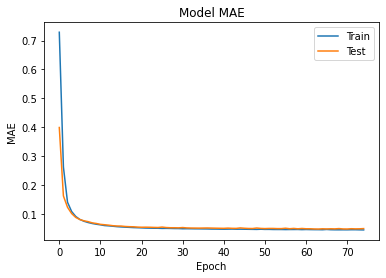

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

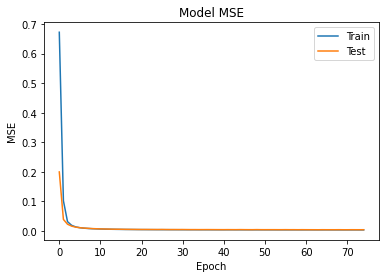

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

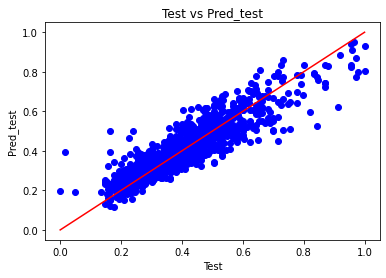

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

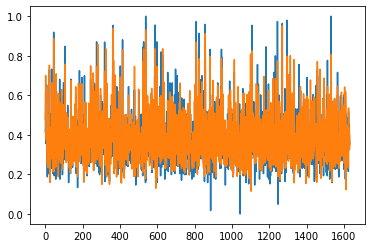

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

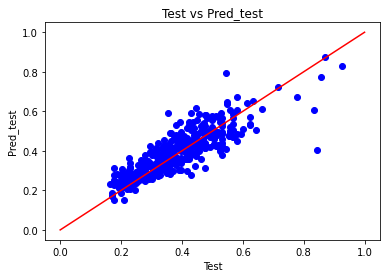

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

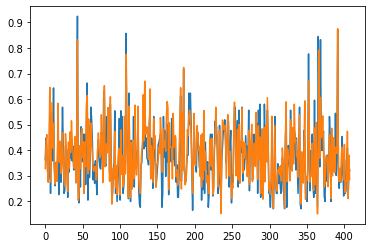

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.05991299201613949
0.06540738988988108


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.964354932308197, p = 1.291400059184498e-19
Test k = 0.9517892599105835, p = 2.816113453540936e-10


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.962618350982666, p_s = 1.5345620312488061e-22
k_n = 229.9274270522191, p_n = 1.180031488856041e-50


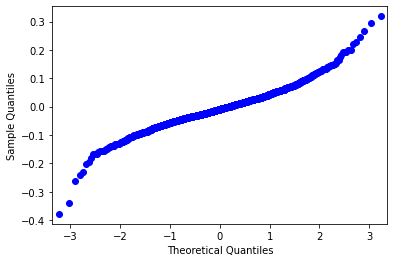

In [21]:
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

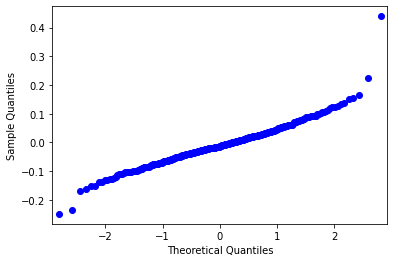

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

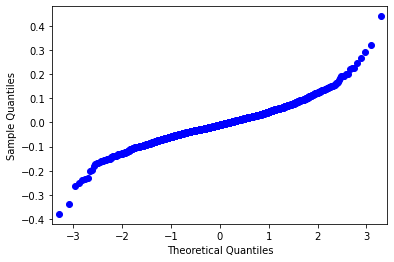

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

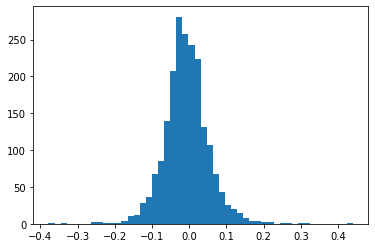

In [24]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetworkNumber1.h5')